In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_excel('AMC_health_and_safety_data.xlsx')

In [3]:
df.head()

,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,...,DAYS_LOST,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND,CLASSIFICATION
0,220143000000,30,MILL OPERATION/PREPARATION PLANT,9/8/2014,2014,3,2014,4,1330,6,...,0.0,N,9/9/2014,?,NO VALUE FOUND,NaN,ee was moving a caustic line when the line fel...,NaN,C,HANDLING OF MATERIALS
1,220163000000,1,UNDERGROUND,10/26/2016,2016,4,2017,1,1400,3,...,11.0,N,11/9/2016,?,NO VALUE FOUND,NaN,employee was building and plastering a brattic...,3.201630e+11,C,HANDLING OF MATERIALS
2,220053000000,3,"STRIP, QUARY, OPEN PIT",10/4/2005,2005,4,2006,1,1325,3,...,1.0,N,10/6/2005,?,NO VALUE FOUND,NaN,he was lifting a piece of steel. he place a ch...,NaN,C,HANDLING OF MATERIALS
3,220063000000,30,MILL OPERATION/PREPARATION PLANT,10/17/2006,2006,4,2007,1,1140,3,...,0.0,NaN,NaN,?,NO VALUE FOUND,NaN,the technician was greasing on the sample syst...,NaN,C,HANDLING OF MATERIALS
4,220151000000,1,UNDERGROUND,2/11/2015,2015,1,2015,2,1430,3,...,9.0,Y,2/27/2015,?,NO VALUE FOUND,NaN,"as employee was lifting top frame of 84"" struc...",3.201510e+11,C,HANDLING OF MATERIALS


In [4]:
df.shape

(36016, 49)

In [5]:
df.columns

Index(['DOCUMENT_NO', 'SUBUNIT_CD', 'SUBUNIT', 'ACCIDENT_DT', 'CAL_YR',
       'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR', 'ACCIDENT_TIME',
       'DEGREE_INJURY_CD', 'DEGREE_INJURY', 'FIPS_STATE_CD', 'UG_LOCATION_CD',
       'UG_LOCATION', 'UG_MINING_METHOD_CD', 'UG_MINING_METHOD',
       'MINING_EQUIP_CD', 'MINING_EQUIP', 'EQUIP_MFR_CD', 'EQUIP_MFR_NAME',
       'EQUIP_MODEL_NO', 'SHIFT_BEGIN_TIME', 'ACCIDENT_TYPE', 'NO_INJURIES',
       'TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER', 'OCCUPATION_CD', 'OCCUPATION',
       'ACTIVITY_CD', 'ACTIVITY', 'INJURY_SOURCE_CD', 'INJURY_SOURCE',
       'NATURE_INJURY_CD', 'NATURE_INJURY', 'INJ_BODY_PART_CD',
       'INJ_BODY_PART', 'SCHEDULE_CHARGE', 'DAYS_RESTRICT', 'DAYS_LOST',
       'TRANS_TERM', 'RETURN_TO_WORK_DT', 'IMMED_NOTIFY_CD', 'IMMED_NOTIFY',
       'INVEST_BEGIN_DT', 'NARRATIVE', 'CLOSED_DOC_NO', 'COAL_METAL_IND',
       'CLASSIFICATION'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36016 entries, 0 to 36015
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DOCUMENT_NO          36016 non-null  int64  
 1   SUBUNIT_CD           36016 non-null  int64  
 2   SUBUNIT              36016 non-null  object 
 3   ACCIDENT_DT          36016 non-null  object 
 4   CAL_YR               36016 non-null  int64  
 5   CAL_QTR              36016 non-null  int64  
 6   FISCAL_YR            36016 non-null  int64  
 7   FISCAL_QTR           36016 non-null  int64  
 8   ACCIDENT_TIME        36016 non-null  int64  
 9   DEGREE_INJURY_CD     36016 non-null  object 
 10  DEGREE_INJURY        36016 non-null  object 
 11  FIPS_STATE_CD        36016 non-null  int64  
 12  UG_LOCATION_CD       36016 non-null  object 
 13  UG_LOCATION          36016 non-null  object 
 14  UG_MINING_METHOD_CD  36016 non-null  object 
 15  UG_MINING_METHOD     36016 non-null 

In [7]:
df.isnull().sum()

DOCUMENT_NO                0
SUBUNIT_CD                 0
SUBUNIT                    0
ACCIDENT_DT                0
CAL_YR                     0
CAL_QTR                    0
FISCAL_YR                  0
FISCAL_QTR                 0
ACCIDENT_TIME              0
DEGREE_INJURY_CD           0
DEGREE_INJURY              0
FIPS_STATE_CD              0
UG_LOCATION_CD             0
UG_LOCATION                0
UG_MINING_METHOD_CD        0
UG_MINING_METHOD           0
MINING_EQUIP_CD            0
MINING_EQUIP               0
EQUIP_MFR_CD               0
EQUIP_MFR_NAME             0
EQUIP_MODEL_NO         20081
SHIFT_BEGIN_TIME          32
ACCIDENT_TYPE              0
NO_INJURIES                0
TOT_EXPER               2729
MINE_EXPER              2313
JOB_EXPER               2199
OCCUPATION_CD              0
OCCUPATION                 0
ACTIVITY_CD                0
ACTIVITY                   0
INJURY_SOURCE_CD           0
INJURY_SOURCE              0
NATURE_INJURY_CD           0
NATURE_INJURY 

removing columns which have high amount of null values

In [8]:
for i in df.columns:
    if(df[i].isnull().sum()>=5000):
        df.drop(i,axis=1,inplace=True)

In [9]:
df.shape

(36016, 44)

removing the columns containing the code of categorical features and also the columns which have high number of unique values

In [10]:
df1=df.drop(['DOCUMENT_NO', 'SUBUNIT_CD', 'ACCIDENT_DT', 'CAL_YR',
       'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR', 'ACCIDENT_TIME',
       'DEGREE_INJURY_CD', 'UG_LOCATION_CD', 'UG_MINING_METHOD_CD', 
       'MINING_EQUIP_CD',  'EQUIP_MFR_CD', 'EQUIP_MFR_NAME','SHIFT_BEGIN_TIME',
       'TOT_EXPER', 'JOB_EXPER', 'OCCUPATION_CD',
       'ACTIVITY_CD', 'INJURY_SOURCE_CD',
       'NATURE_INJURY_CD', 'INJ_BODY_PART_CD','RETURN_TO_WORK_DT', 'IMMED_NOTIFY_CD', 'IMMED_NOTIFY',
             'NARRATIVE'],axis=1)

In [11]:
df1

,SUBUNIT,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,MINING_EQUIP,ACCIDENT_TYPE,NO_INJURIES,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST,TRANS_TERM,COAL_METAL_IND,CLASSIFICATION
0,MILL OPERATION/PREPARATION PLANT,"NO DYS AWY FRM WRK,NO RSTR ACT",1,NO VALUE FOUND,NO VALUE FOUND,NO VALUE FOUND,"Absorption of radiations, caustics, toxic and ...",1,8.77,"Maintenance man, Mechanic, Repair/Serviceman,...",Handling supplies or material,"CHEMICALS,CHEM COMP,NEC","BURN,CHEMICL-FUME,COMPOUN",EYE(S) OPTIC NERVE/VISON,0.0,N,C,HANDLING OF MATERIALS
1,UNDERGROUND,DAYS AWAY FROM WORK ONLY,1,VERTICAL SHAFT,Continuous Mining,NO VALUE FOUND,"Absorption of radiations, caustics, toxic and ...",1,7.83,"Roof bolter, Rock bolter, Pinner, Mobile roof...",Set or remove brattice,"ACIDS,ALKALI,WET CEMENT","BURN,CHEMICL-FUME,COMPOUN",EYE(S) OPTIC NERVE/VISON,11.0,N,C,HANDLING OF MATERIALS
2,"STRIP, QUARY, OPEN PIT",DAYS AWAY FROM WORK ONLY,1,NO VALUE FOUND,NO VALUE FOUND,NO VALUE FOUND,Struck by falling object,1,0.27,"Belt foreman, Maintenance foreman, Maintenance...",Handling supplies or material,"METAL,NEC(PIPE,WIRE,NAIL)","UNCLASSIFIED,NOT DETERMED",FINGER(S)/THUMB,1.0,N,C,HANDLING OF MATERIALS
3,MILL OPERATION/PREPARATION PLANT,DAYS AWAY FROM WORK ONLY,4,NO VALUE FOUND,NO VALUE FOUND,"Cutting machine, Chain cutter",Struck against stationary object,1,18.98,"Quality control technician, Laboratory technic...",Machine maintenance,"METAL,NEC(PIPE,WIRE,NAIL)","CUT,LACER,PUNCT-OPN WOUND",HAND (NOT WRIST OR FINGERS),0.0,NaN,C,HANDLING OF MATERIALS
4,UNDERGROUND,DAYS AWAY FROM WORK ONLY,8,LAST OPEN CROSSCUT,Longwall,NO VALUE FOUND,Over-exertion in lifting objects,1,0.12,"Laborer, Bull gang, Parts runner, Roustabout,...",Handling supplies or material,"METAL,NEC(PIPE,WIRE,NAIL)","SPRAIN,STRAIN RUPT DISC",HIPS (PELVIS/ORGANS/KIDNEYS/BUTTOCKS),9.0,Y,C,HANDLING OF MATERIALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36011,UNDERGROUND,INJURIES DUE TO NATURAL CAUSES,51,SLOPE/INCLINED SHAFT,Continuous Mining,NO VALUE FOUND,NEC,1,6.42,"Belt foreman, Maintenance foreman, Maintenance...",Idle,"MISCELLANEOUS,NEC",HEART ATTACK,BODY SYSTEMS,0.0,NaN,C,OTHER
36012,"STRIP, QUARY, OPEN PIT","NO DYS AWY FRM WRK,NO RSTR ACT",51,NO VALUE FOUND,NO VALUE FOUND,NO VALUE FOUND,Struck by flying object,1,4.00,"Maintenance man, Mechanic, Repair/Serviceman,...",Machine maintenance,PULVERIZED MINERAL (DUST),DUST IN EYES,EYE(S) OPTIC NERVE/VISON,0.0,N,C,OTHER
36013,SURFACE AT UNDERGROUND,INJURIES DUE TO NATURAL CAUSES,54,NO VALUE FOUND,NO VALUE FOUND,NO VALUE FOUND,NEC,1,10.00,"Continuous miner operator, Coal mole operator","Change house, Bathing","MISCELLANEOUS,NEC",HEART ATTACK,BODY SYSTEMS,0.0,NaN,C,OTHER
36014,UNDERGROUND,DAYS AWAY FROM WORK ONLY,54,FACE,Longwall,NO VALUE FOUND,"Absorption of radiations, caustics, toxic and ...",1,0.46,"Laborer, Bull gang, Faceman, Parts runner, Rou...",Handling supplies or material,"ANIMALS,INSCTS,BRDS,REPTL","POISONING,SYSTEMIC",BODY SYSTEMS,32.0,N,C,OTHER


In [12]:
for i in df1.columns:
    print(df[i].value_counts())

UNDERGROUND                         24492
STRIP, QUARY, OPEN PIT               5642
MILL OPERATION/PREPARATION PLANT     3528
SURFACE AT UNDERGROUND               2125
OFFICE WORKERS AT MINE SITE            85
INDEPENDENT SHOPS OR YARDS             63
AUGER                                  45
CULM BANK/REFUSE PILE                  30
DREDGE                                  6
Name: SUBUNIT, dtype: int64
DAYS AWAY FROM WORK ONLY          19773
NO DYS AWY FRM WRK,NO RSTR ACT    10314
DAYS RESTRICTED ACTIVITY ONLY      2076
DYS AWY FRM WRK & RESTRCTD ACT     1703
ACCIDENT ONLY                      1175
PERM TOT OR PERM PRTL DISABLTY      394
FATALITY                            186
ALL OTHER CASES (INCL 1ST AID)      172
INJURIES DUE TO NATURAL CAUSES      145
NO VALUE FOUND                       46
INJURIES INVOLVNG NONEMPLOYEES       19
OCCUPATNAL ILLNESS NOT DEG 1-6       13
Name: DEGREE_INJURY, dtype: int64
54    12243
21     8050
42     4869
51     2739
17     1760
56     1422
39     1

AS MINING EQUIP CONTAINS HIGH NUMBER OF ROWS WHICH HAVE VALUES AS NO VALUE FOUND HENCE IT IS BETTER TO DROP THIS COLUMNS

In [13]:
df1.drop('MINING_EQUIP',axis=1,inplace=True)

In [14]:
categoric_cols = [categoric for categoric in df1.columns if df1[categoric].dtype in ['object']]
categoric_cols

['SUBUNIT',
 'DEGREE_INJURY',
 'UG_LOCATION',
 'UG_MINING_METHOD',
 'ACCIDENT_TYPE',
 'OCCUPATION',
 'ACTIVITY',
 'INJURY_SOURCE',
 'NATURE_INJURY',
 'INJ_BODY_PART',
 'TRANS_TERM',
 'COAL_METAL_IND',
 'CLASSIFICATION']

In [15]:
for i in categoric_cols:
    df1.drop((df1[df1[i]=="NO VALUE FOUND"]).index,axis=0,inplace=True)

In [16]:
df1.shape

(21368, 17)

In [17]:
for i in categoric_cols:
    df1.drop((df1[df1[i]=="NOT MARKED"]).index,axis=0,inplace=True)

In [18]:
df1.shape

(21189, 17)

In [19]:
for i in categoric_cols:
    df1.drop((df1[df1[i]=="OTHER"]).index,axis=0,inplace=True)

In [20]:
df1.shape

(18892, 17)

In [21]:
df1.COAL_METAL_IND.unique()

array(['C', 'M'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in categoric_cols:
    df1[i] = label_encoder.fit_transform(df1[i])

In [23]:
df1

,SUBUNIT,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,ACCIDENT_TYPE,NO_INJURIES,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST,TRANS_TERM,COAL_METAL_IND,CLASSIFICATION
1,0,1,1,5,1,0,1,7.83,61,62,1,2,12,11.0,0,0,5
4,0,1,8,2,4,23,1,0.12,40,32,61,23,21,9.0,1,0,5
5,0,1,8,2,1,23,1,1.29,40,32,9,23,4,17.0,0,0,5
6,0,1,17,0,4,23,1,24.44,44,32,16,23,4,20.0,0,0,5
7,0,1,17,4,1,23,1,12.19,45,32,14,23,4,7.0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34857,0,7,21,1,1,20,1,4.50,61,46,74,21,5,9.0,0,0,9
34859,0,7,39,0,1,20,1,23.50,70,58,40,24,5,NaN,0,0,9
35052,0,1,17,0,1,30,1,0.09,41,64,17,23,31,11.0,0,0,1
35053,0,0,54,5,1,16,1,0.06,40,32,86,25,40,0.0,0,0,1


In [24]:
df1.dropna()

,SUBUNIT,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,ACCIDENT_TYPE,NO_INJURIES,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST,TRANS_TERM,COAL_METAL_IND,CLASSIFICATION
1,0,1,1,5,1,0,1,7.83,61,62,1,2,12,11.0,0,0,5
4,0,1,8,2,4,23,1,0.12,40,32,61,23,21,9.0,1,0,5
5,0,1,8,2,1,23,1,1.29,40,32,9,23,4,17.0,0,0,5
6,0,1,17,0,4,23,1,24.44,44,32,16,23,4,20.0,0,0,5
7,0,1,17,4,1,23,1,12.19,45,32,14,23,4,7.0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,0,1,54,1,1,31,1,2.00,27,32,13,14,14,119.0,0,0,2
34857,0,7,21,1,1,20,1,4.50,61,46,74,21,5,9.0,0,0,9
35052,0,1,17,0,1,30,1,0.09,41,64,17,23,31,11.0,0,0,1
35053,0,0,54,5,1,16,1,0.06,40,32,86,25,40,0.0,0,0,1


In [25]:
df1.corr()

,SUBUNIT,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,ACCIDENT_TYPE,NO_INJURIES,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST,TRANS_TERM,COAL_METAL_IND,CLASSIFICATION
SUBUNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEGREE_INJURY,NaN,1.000000,-0.106689,-0.018481,-0.076320,0.084223,0.015923,-0.059590,-0.043256,-0.089245,-0.027902,-0.451224,0.006338,-0.345388,-0.115110,0.001594,-0.161151
FIPS_STATE_CD,NaN,-0.106689,1.000000,-0.070372,0.211336,-0.052898,0.042116,0.032007,-0.027649,-0.014237,0.005487,0.029371,0.000894,0.101998,-0.020044,-0.007422,0.041395
UG_LOCATION,NaN,-0.018481,-0.070372,1.000000,0.223996,-0.031713,0.002331,0.047096,-0.186740,-0.107776,-0.026246,0.035647,-0.005669,0.031347,0.006498,-0.001291,0.095403
UG_MINING_METHOD,NaN,-0.076320,0.211336,0.223996,1.000000,-0.039377,0.013767,0.153384,-0.072517,-0.067279,-0.016590,0.022206,0.023332,0.080589,-0.018847,0.008715,0.037813
ACCIDENT_TYPE,NaN,0.084223,-0.052898,-0.031713,-0.039377,1.000000,0.024946,0.000689,-0.007193,-0.076788,-0.121505,0.002442,0.075122,-0.059322,-0.033747,0.001137,-0.129103
NO_INJURIES,NaN,0.015923,0.042116,0.002331,0.013767,0.024946,1.000000,-0.003934,-0.017495,0.058646,0.028089,0.020442,0.036496,-0.002652,0.208012,-0.000600,-0.049177
MINE_EXPER,NaN,-0.059590,0.032007,0.047096,0.153384,0.000689,-0.003934,1.000000,-0.041176,-0.026362,-0.003234,0.088489,0.028793,0.087792,-0.031057,-0.000044,0.054019
OCCUPATION,NaN,-0.043256,-0.027649,-0.186740,-0.072517,-0.007193,-0.017495,-0.041176,1.000000,0.199078,0.107151,0.014608,0.010438,0.000033,0.009205,0.008872,-0.025577
ACTIVITY,NaN,-0.089245,-0.014237,-0.107776,-0.067279,-0.076788,0.058646,-0.026362,0.199078,1.000000,0.109942,0.070346,0.025080,0.043299,0.021127,-0.005879,0.236537


In [26]:
df1.SUBUNIT.unique()

array([0])

In [27]:
df1.drop("SUBUNIT",axis=1,inplace=True)

In [28]:
df1.corr()

,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,ACCIDENT_TYPE,NO_INJURIES,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST,TRANS_TERM,COAL_METAL_IND,CLASSIFICATION
DEGREE_INJURY,1.000000,-0.106689,-0.018481,-0.076320,0.084223,0.015923,-0.059590,-0.043256,-0.089245,-0.027902,-0.451224,0.006338,-0.345388,-0.115110,0.001594,-0.161151
FIPS_STATE_CD,-0.106689,1.000000,-0.070372,0.211336,-0.052898,0.042116,0.032007,-0.027649,-0.014237,0.005487,0.029371,0.000894,0.101998,-0.020044,-0.007422,0.041395
UG_LOCATION,-0.018481,-0.070372,1.000000,0.223996,-0.031713,0.002331,0.047096,-0.186740,-0.107776,-0.026246,0.035647,-0.005669,0.031347,0.006498,-0.001291,0.095403
UG_MINING_METHOD,-0.076320,0.211336,0.223996,1.000000,-0.039377,0.013767,0.153384,-0.072517,-0.067279,-0.016590,0.022206,0.023332,0.080589,-0.018847,0.008715,0.037813
ACCIDENT_TYPE,0.084223,-0.052898,-0.031713,-0.039377,1.000000,0.024946,0.000689,-0.007193,-0.076788,-0.121505,0.002442,0.075122,-0.059322,-0.033747,0.001137,-0.129103
NO_INJURIES,0.015923,0.042116,0.002331,0.013767,0.024946,1.000000,-0.003934,-0.017495,0.058646,0.028089,0.020442,0.036496,-0.002652,0.208012,-0.000600,-0.049177
MINE_EXPER,-0.059590,0.032007,0.047096,0.153384,0.000689,-0.003934,1.000000,-0.041176,-0.026362,-0.003234,0.088489,0.028793,0.087792,-0.031057,-0.000044,0.054019
OCCUPATION,-0.043256,-0.027649,-0.186740,-0.072517,-0.007193,-0.017495,-0.041176,1.000000,0.199078,0.107151,0.014608,0.010438,0.000033,0.009205,0.008872,-0.025577
ACTIVITY,-0.089245,-0.014237,-0.107776,-0.067279,-0.076788,0.058646,-0.026362,0.199078,1.000000,0.109942,0.070346,0.025080,0.043299,0.021127,-0.005879,0.236537
INJURY_SOURCE,-0.027902,0.005487,-0.026246,-0.016590,-0.121505,0.028089,-0.003234,0.107151,0.109942,1.000000,0.014096,0.048574,0.028396,0.018047,0.003217,0.184288


In [29]:
df1.describe()

,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,ACCIDENT_TYPE,NO_INJURIES,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST,TRANS_TERM,COAL_METAL_IND,CLASSIFICATION
count,18892.000000,18892.000000,18892.000000,18892.000000,18892.000000,18892.000000,18689.000000,18892.000000,18892.000000,18892.000000,18892.000000,18892.000000,17694.000000,18892.000000,18892.000000,18892.000000
mean,2.710936,38.081516,1.119098,1.726657,22.056532,1.069765,4.602580,43.304732,43.130743,49.902393,14.582151,18.273343,44.968407,0.090832,0.000159,5.582416
std,2.285767,15.985867,1.162377,1.359332,10.457265,1.466006,6.553335,20.400960,16.715617,26.496322,7.443168,10.749511,78.408430,0.340803,0.012601,1.271445
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,1.000000,17.000000,1.000000,0.620000,27.000000,32.000000,25.000000,7.000000,12.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,42.000000,1.000000,1.000000,23.000000,1.000000,2.000000,44.000000,44.000000,60.000000,14.000000,16.000000,10.000000,0.000000,0.000000,5.000000
75%,6.000000,54.000000,2.000000,1.000000,30.000000,1.000000,5.500000,61.000000,58.000000,64.000000,23.000000,25.000000,58.000000,0.000000,0.000000,6.000000
max,8.000000,56.000000,5.000000,6.000000,35.000000,36.000000,43.850000,82.000000,77.000000,100.000000,25.000000,44.000000,2470.000000,2.000000,1.000000,9.000000


In [30]:
def remove_outliers(df, column_name):
    # Calculate Q1 and Q3
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers inplace
    df.drop(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index, inplace=True)

In [31]:
outlier_removal_cols=['DAYS_LOST']
for i in outlier_removal_cols:
    remove_outliers(df1,i)

In [32]:
df1.describe()

,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,ACCIDENT_TYPE,NO_INJURIES,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST,TRANS_TERM,COAL_METAL_IND,CLASSIFICATION
count,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17143.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,16126.000000,17324.000000,17324.000000,17324.000000
mean,2.848880,37.615216,1.102286,1.699838,22.156950,1.066671,4.489694,43.444355,43.052297,49.834449,14.234011,18.097264,25.687895,0.079831,0.000173,5.557723
std,2.319291,16.041968,1.160968,1.340689,10.612785,1.435363,6.419710,20.340318,16.618276,26.470694,7.399609,10.531434,36.016405,0.331755,0.013159,1.256589
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,1.000000,17.000000,1.000000,0.620000,27.000000,32.000000,25.000000,7.000000,12.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,42.000000,1.000000,1.000000,23.000000,1.000000,2.000000,44.000000,44.000000,60.000000,14.000000,16.000000,6.000000,0.000000,0.000000,5.000000
75%,6.000000,54.000000,2.000000,1.000000,30.000000,1.000000,5.310000,61.000000,58.000000,64.000000,23.000000,23.000000,41.000000,0.000000,0.000000,6.000000
max,8.000000,56.000000,5.000000,6.000000,35.000000,36.000000,43.850000,82.000000,77.000000,100.000000,25.000000,44.000000,145.000000,2.000000,1.000000,9.000000


In [33]:
df1.corr()

,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,ACCIDENT_TYPE,NO_INJURIES,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST,TRANS_TERM,COAL_METAL_IND,CLASSIFICATION
DEGREE_INJURY,1.000000,-0.093765,-0.008516,-0.069782,0.087882,0.019552,-0.052553,-0.051904,-0.095437,-0.030119,-0.444193,0.018715,-0.458727,-0.105260,0.000858,-0.159764
FIPS_STATE_CD,-0.093765,1.000000,-0.069148,0.211767,-0.052239,0.042294,0.027817,-0.029196,-0.017794,0.004272,0.018503,-0.007138,0.049686,-0.022397,-0.007341,0.037860
UG_LOCATION,-0.008516,-0.069148,1.000000,0.223115,-0.032244,0.000930,0.044445,-0.194167,-0.112342,-0.029355,0.028285,-0.009553,-0.006053,0.002029,-0.001160,0.092265
UG_MINING_METHOD,-0.069782,0.211767,0.223115,1.000000,-0.040822,0.018889,0.151556,-0.075179,-0.066412,-0.021564,0.017246,0.011574,0.049597,-0.014261,0.009491,0.036738
ACCIDENT_TYPE,0.087882,-0.052239,-0.032244,-0.040822,1.000000,0.027666,0.001650,-0.004489,-0.079003,-0.116246,-0.005085,0.084689,-0.074535,-0.031874,0.001045,-0.124720
NO_INJURIES,0.019552,0.042294,0.000930,0.018889,0.027666,1.000000,-0.001861,-0.017274,0.069262,0.026804,0.019967,0.046435,-0.030624,0.240610,-0.000611,-0.051438
MINE_EXPER,-0.052553,0.027817,0.044445,0.151556,0.001650,-0.001861,1.000000,-0.038354,-0.033613,-0.004945,0.079458,0.021688,0.106735,-0.039753,0.000144,0.053650
OCCUPATION,-0.051904,-0.029196,-0.194167,-0.075179,-0.004489,-0.017274,-0.038354,1.000000,0.204993,0.105551,0.018428,0.010110,0.031187,0.006420,0.009202,-0.024790
ACTIVITY,-0.095437,-0.017794,-0.112342,-0.066412,-0.079003,0.069262,-0.033613,0.204993,1.000000,0.106155,0.075962,0.018454,0.063760,0.019964,-0.006113,0.228246
INJURY_SOURCE,-0.030119,0.004272,-0.029355,-0.021564,-0.116246,0.026804,-0.004945,0.105551,0.106155,1.000000,0.022449,0.046409,0.043334,0.021285,0.003397,0.180707


In [34]:
df1.drop(['TRANS_TERM','NO_INJURIES'],axis=1,inplace=True)

In [35]:
df1.isnull().sum()

DEGREE_INJURY          0
FIPS_STATE_CD          0
UG_LOCATION            0
UG_MINING_METHOD       0
ACCIDENT_TYPE          0
MINE_EXPER           181
OCCUPATION             0
ACTIVITY               0
INJURY_SOURCE          0
NATURE_INJURY          0
INJ_BODY_PART          0
DAYS_LOST           1198
COAL_METAL_IND         0
CLASSIFICATION         0
dtype: int64

In [36]:
df1.dropna(inplace=True)

In [37]:
df1.isnull().sum()

DEGREE_INJURY       0
FIPS_STATE_CD       0
UG_LOCATION         0
UG_MINING_METHOD    0
ACCIDENT_TYPE       0
MINE_EXPER          0
OCCUPATION          0
ACTIVITY            0
INJURY_SOURCE       0
NATURE_INJURY       0
INJ_BODY_PART       0
DAYS_LOST           0
COAL_METAL_IND      0
CLASSIFICATION      0
dtype: int64

<AxesSubplot:>

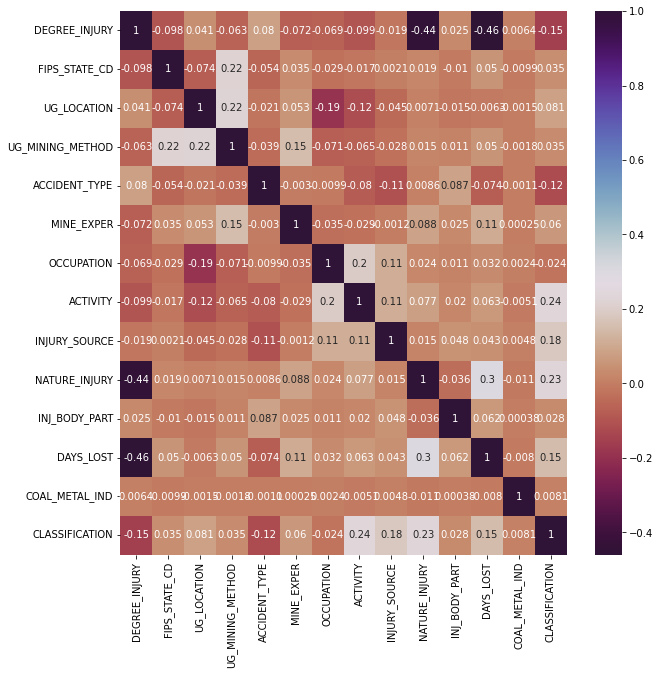

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap="twilight_shifted_r")

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:

X=df1.iloc[:,0:12]
Y=df1.iloc[:,-1]

In [41]:
Y.unique()

array([5, 8, 6, 4, 3, 0, 2, 9, 1, 7])

In [42]:
df1

,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,ACCIDENT_TYPE,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST,COAL_METAL_IND,CLASSIFICATION
1,1,1,5,1,0,7.83,61,62,1,2,12,11.0,0,5
4,1,8,2,4,23,0.12,40,32,61,23,21,9.0,0,5
5,1,8,2,1,23,1.29,40,32,9,23,4,17.0,0,5
6,1,17,0,4,23,24.44,44,32,16,23,4,20.0,0,5
7,1,17,4,1,23,12.19,45,32,14,23,4,7.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,1,54,1,1,31,2.00,27,32,13,14,14,119.0,0,2
34857,7,21,1,1,20,4.50,61,46,74,21,5,9.0,0,9
35052,1,17,0,1,30,0.09,41,64,17,23,31,11.0,0,1
35053,0,54,5,1,16,0.06,40,32,86,25,40,0.0,0,1


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=50)

In [45]:
X_train

,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION,UG_MINING_METHOD,ACCIDENT_TYPE,MINE_EXPER,OCCUPATION,ACTIVITY,INJURY_SOURCE,NATURE_INJURY,INJ_BODY_PART,DAYS_LOST
19593,6,42,0,1,3,0.15,41,58,84,7,15,0.0
3145,1,51,0,1,24,3.46,61,62,15,23,34,8.0
2070,1,21,2,1,22,4.00,40,33,78,23,38,120.0
27875,1,54,0,4,22,25.00,41,74,62,23,23,66.0
33230,1,1,2,4,27,6.08,51,43,71,5,21,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33450,1,21,1,1,34,0.15,61,50,20,23,24,30.0
12712,1,18,0,1,23,0.77,12,48,25,23,34,41.0
20441,1,54,2,1,19,0.38,27,75,57,12,12,2.0
11402,1,54,2,1,0,0.27,40,32,1,2,14,19.0


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model2=DecisionTreeClassifier()

In [48]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [49]:
tree_predict=model2.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
score2=accuracy_score(tree_predict,Y_test)

In [52]:
score2

0.9051773184145647

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')

In [55]:
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [56]:
KNN_predict=model.predict(X_test)

In [57]:
score2=accuracy_score(KNN_predict,Y_test)
score2

0.8016309501232695

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()

In [59]:
ABC.fit(X_train,Y_train)

AdaBoostClassifier()

In [60]:
ABC_predict=ABC.predict(X_test)

In [61]:
score3=accuracy_score(ABC_predict,Y_test)
score3

0.6982742271951451

In [62]:
from xgboost import XGBClassifier

In [63]:
XGB=XGBClassifier()

In [64]:
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [65]:
XGB_predict=XGB.predict(X_test)

In [66]:
score=accuracy_score(XGB_predict,Y_test)

In [67]:
score

0.9448131993172767

In [73]:
import joblib

In [75]:
joblib.dump(XGB,"mining_injury_classification")

['mining_injury_classification']